In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Drop Null Values
data.dropna(inplace=True, axis=0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

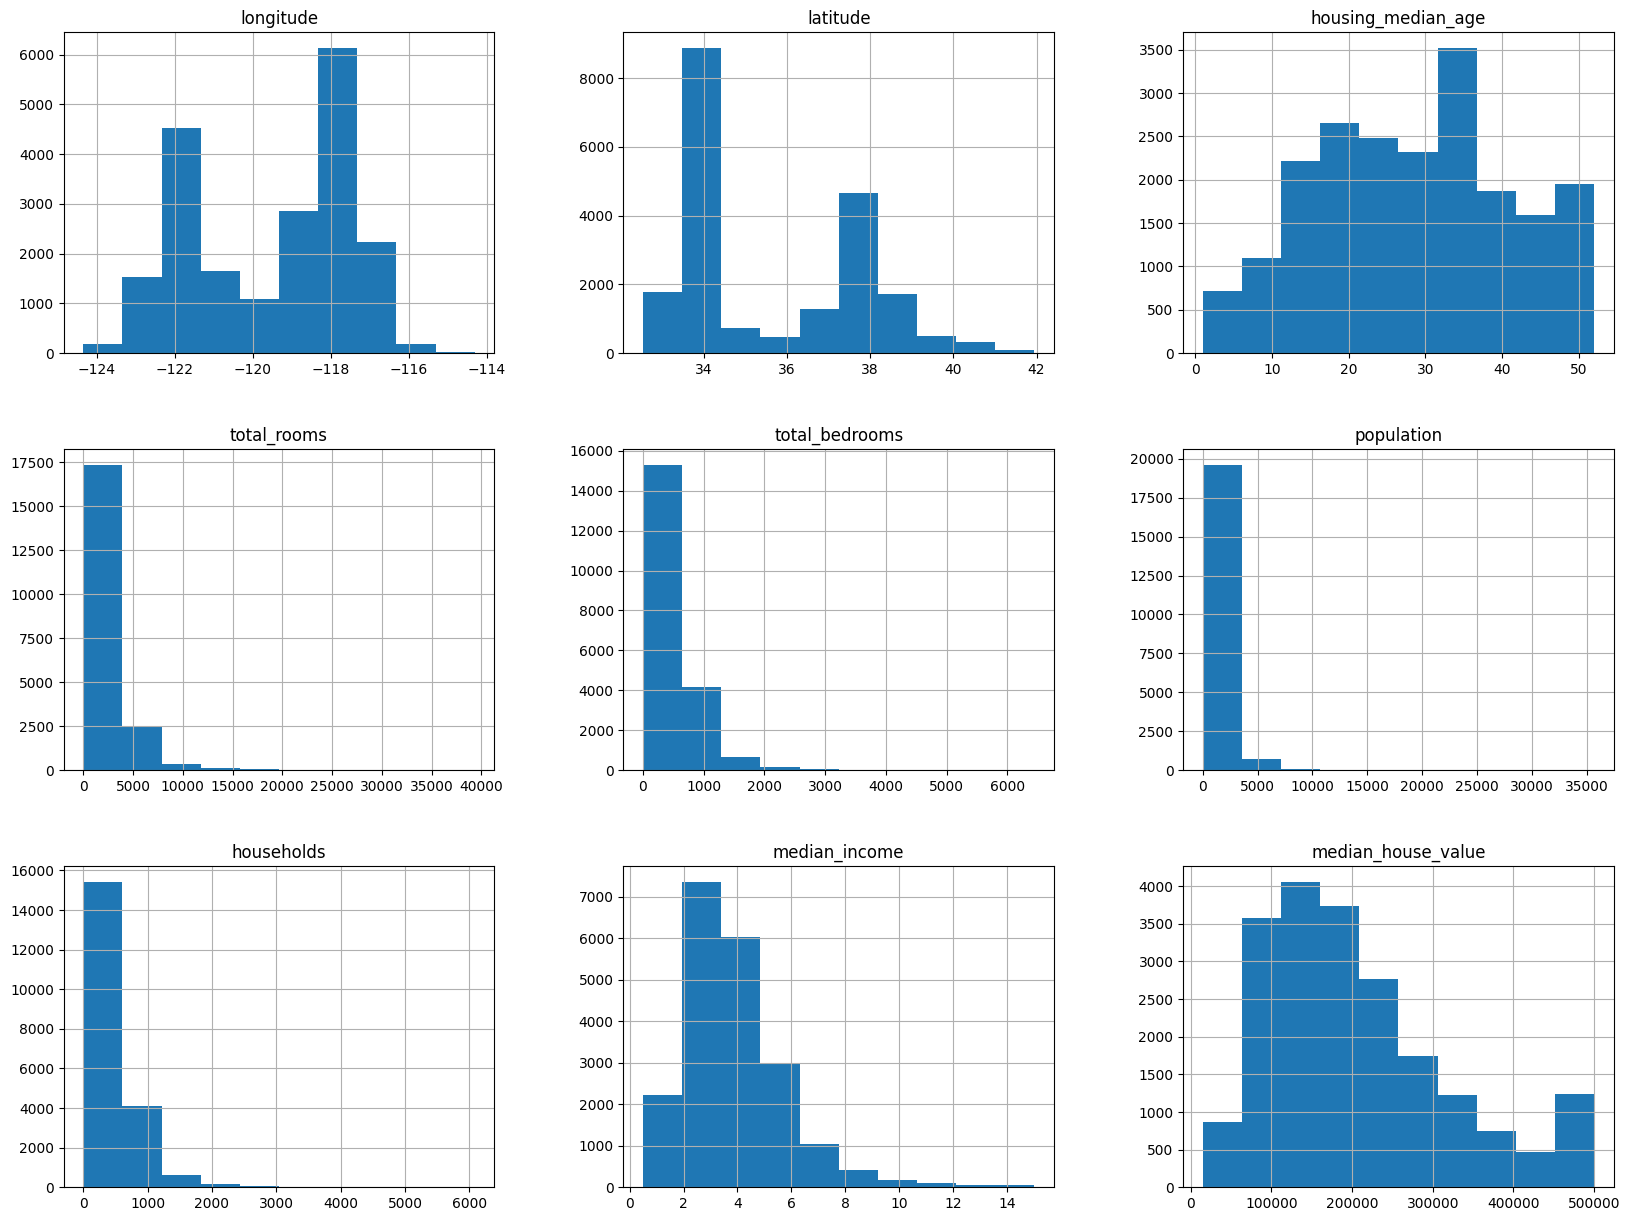

In [6]:
data.hist(figsize=(20,15))

In [7]:
data = data.join(pd.get_dummies(data['ocean_proximity']).map(lambda x: 1 if x==True else 0)).drop('ocean_proximity', axis=1)

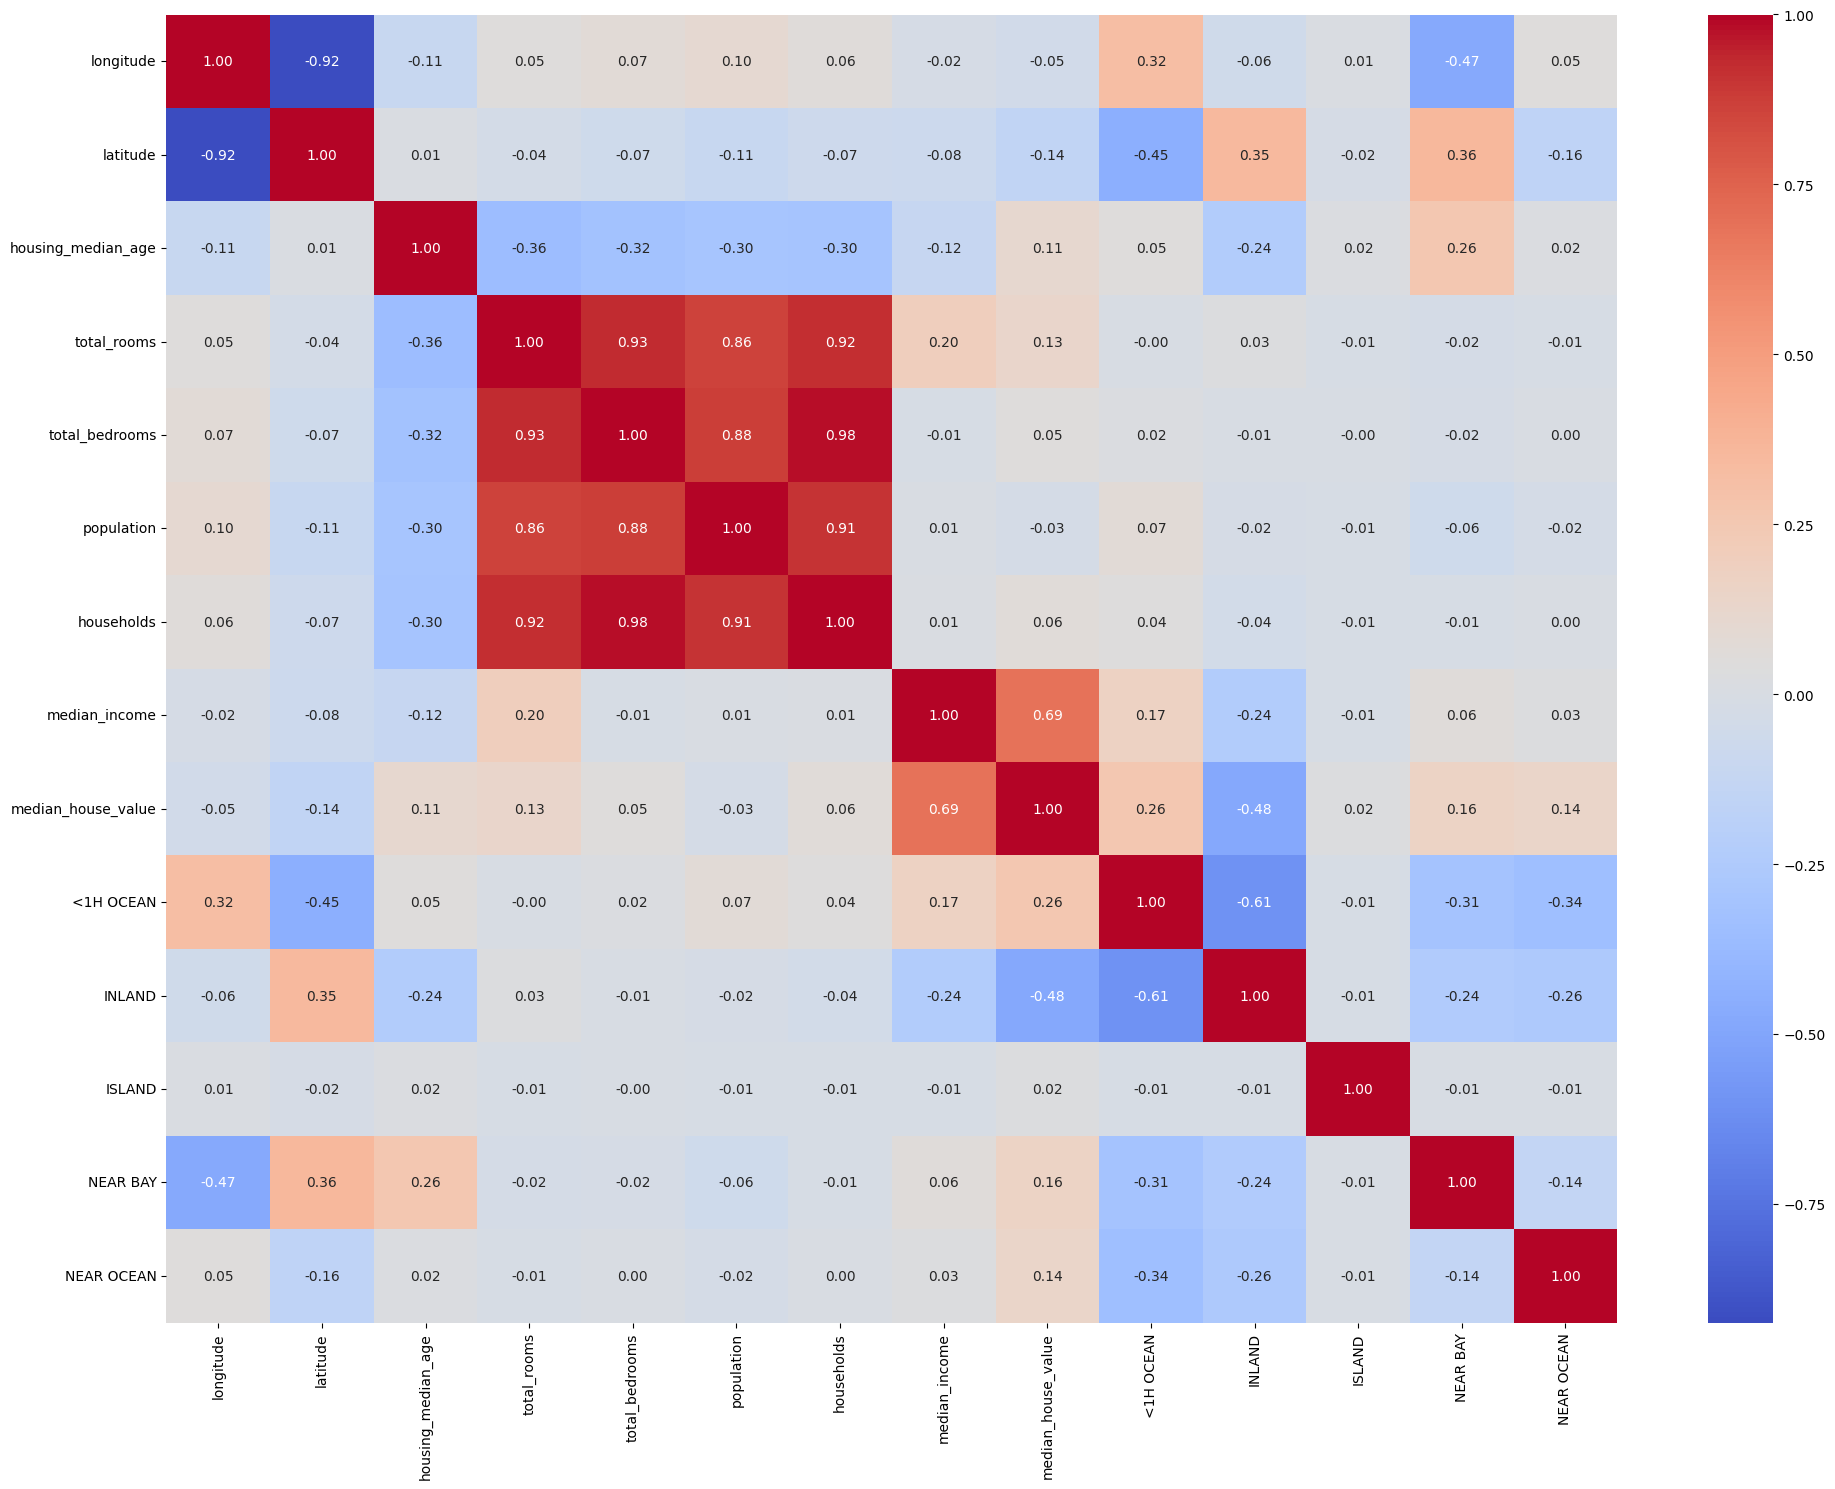

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.tight_layout()
plt.show()

In [9]:
data['total_rooms'] = np.log(data['total_rooms']+1)
data['total_bedrooms'] = np.log(data['total_bedrooms']+1)
data['population'] = np.log(data['population']+1)
data['households'] = np.log(data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

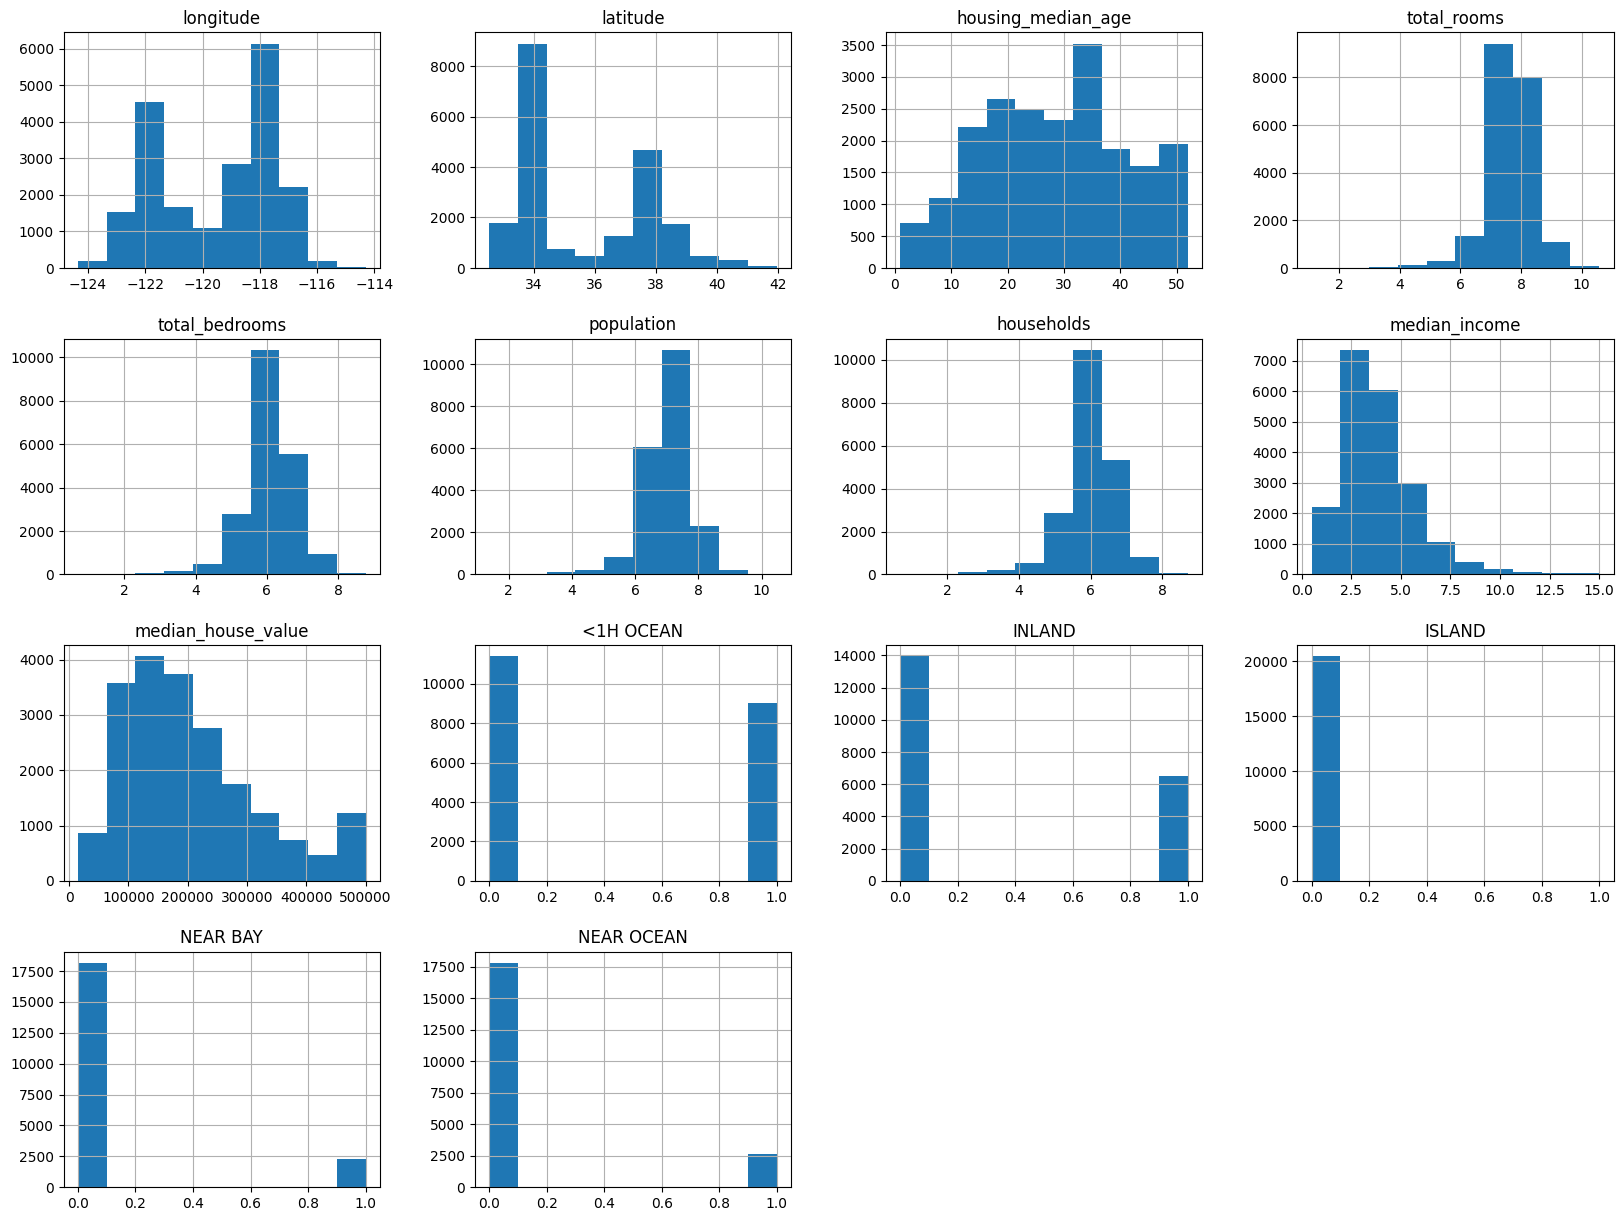

In [10]:
data.hist(figsize=(20,15))

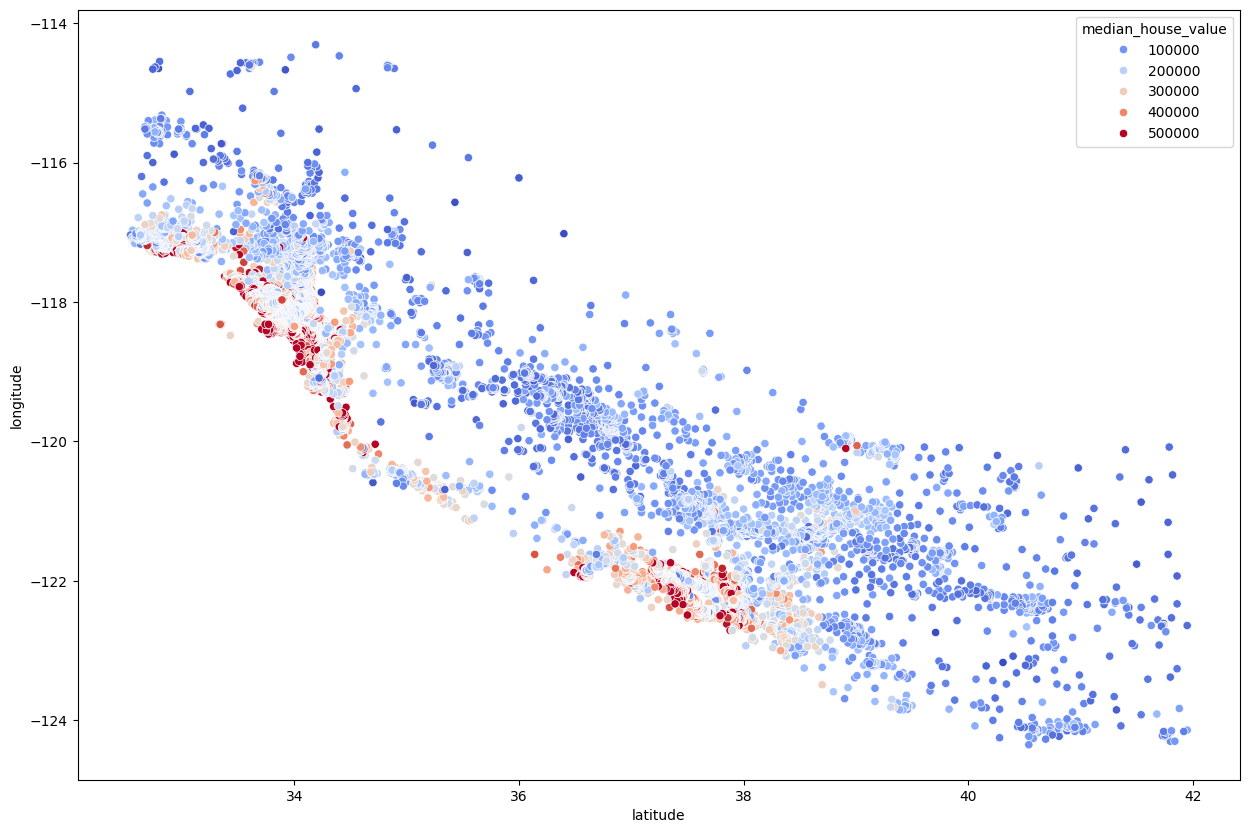

In [11]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='latitude', y='longitude', data=data, hue='median_house_value', palette='coolwarm')
plt.show()

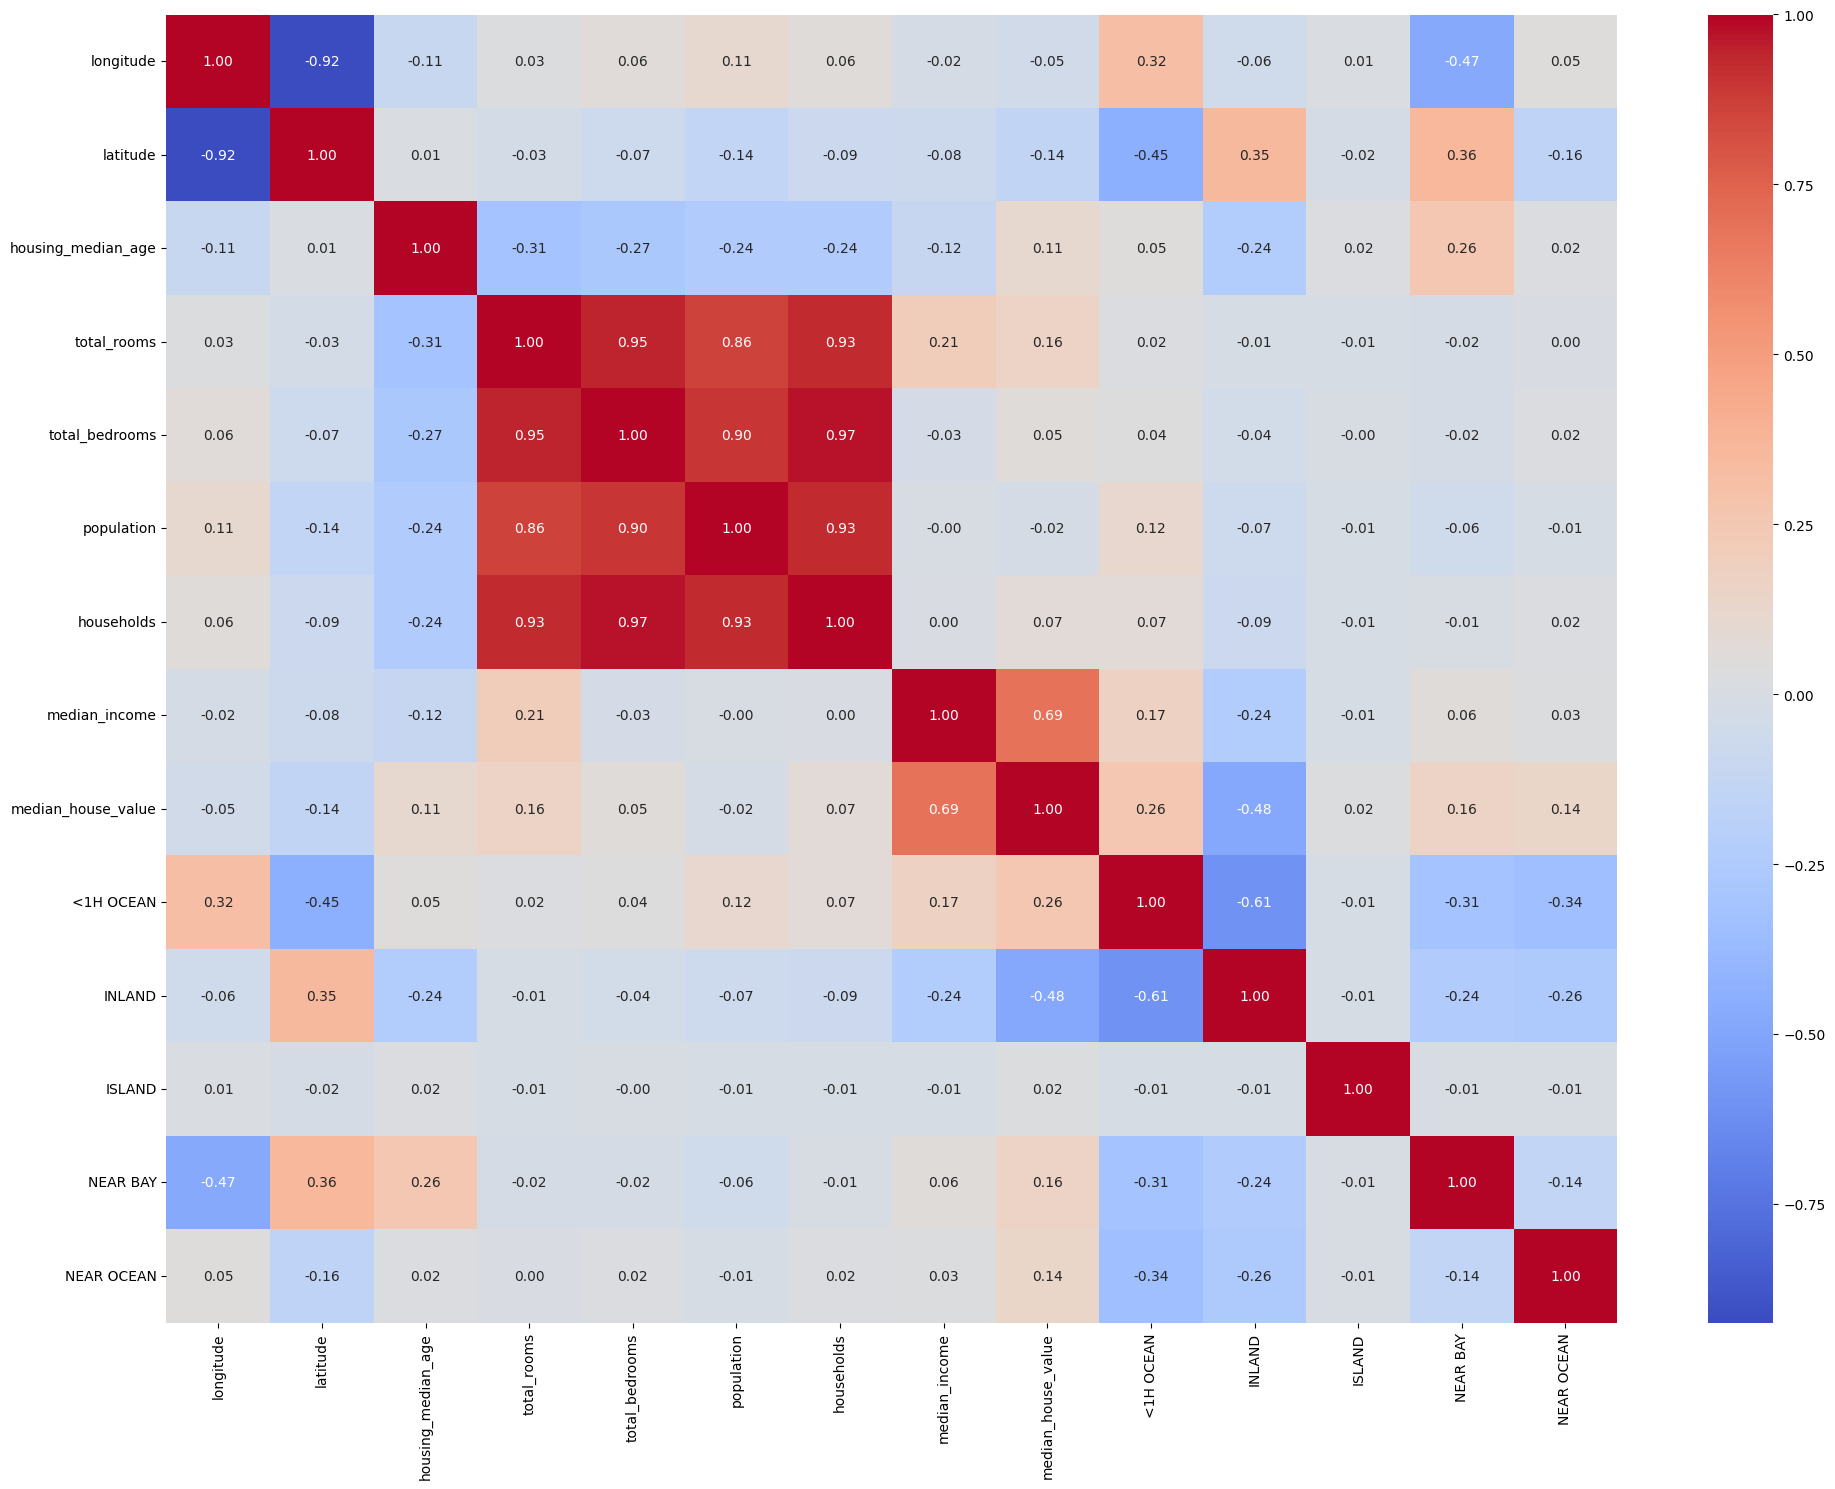

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.tight_layout()
plt.show()

In [13]:
data['bedroom_ratio'] = data['total_bedrooms']/data['total_rooms']
data['household_rooms'] = data['total_rooms']/data['households']

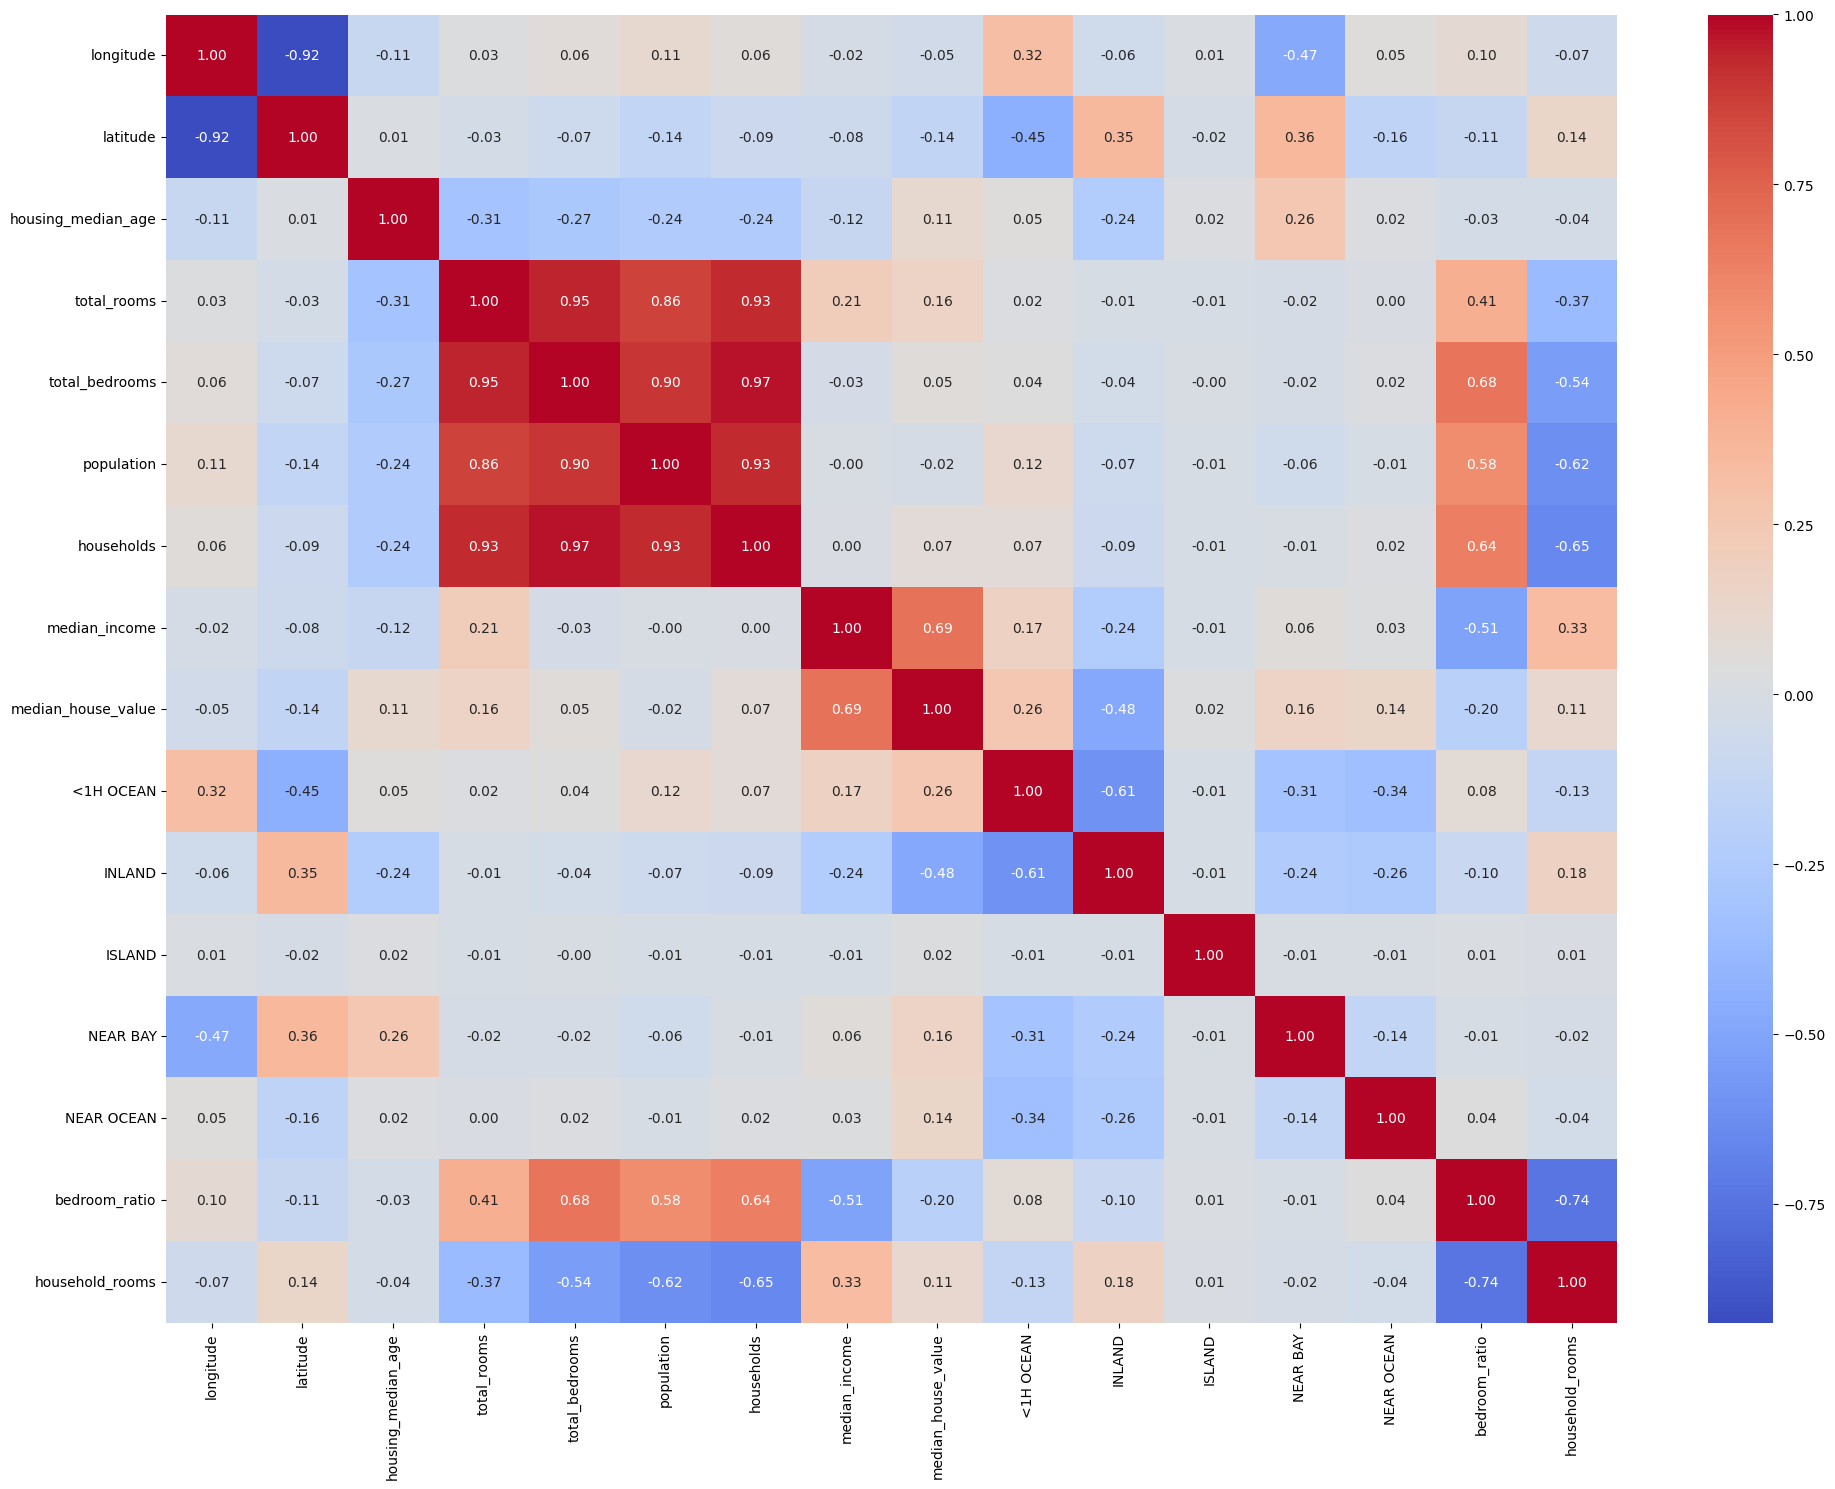

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.tight_layout()
plt.show()

## Regression Modeling


In [15]:
from sklearn.model_selection import train_test_split
X = data.drop(['total_rooms', 'total_bedrooms', 'households', 'median_house_value'], axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Linear Regression Model


In [16]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [17]:
reg_model.score(X_test, y_test)

0.6303588183247661

In [18]:
dict(zip(reg_model.feature_names_in_, reg_model.coef_))

{'longitude': np.float64(-27522.609360217404),
 'latitude': np.float64(-25729.051503337552),
 'housing_median_age': np.float64(846.1522623109923),
 'population': np.float64(-26028.427362739792),
 'median_income': np.float64(46528.36583504833),
 '<1H OCEAN': np.float64(-20545.328092297957),
 'INLAND': np.float64(-50648.755701896924),
 'ISLAND': np.float64(103102.05201306821),
 'NEAR BAY': np.float64(-18631.13633658999),
 'NEAR OCEAN': np.float64(-13276.831882282688),
 'bedroom_ratio': np.float64(963569.3140838485),
 'household_rooms': np.float64(64599.405546297894)}

### Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()


In [21]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
forest.score(X_test, y_test)

0.8144574712146293

In [23]:
feature_importances = dict(sorted(list(zip(forest.feature_names_in_, forest.feature_importances_)), key= lambda x: x[1], reverse=True))
feature_importances

{'median_income': np.float64(0.4895536257015576),
 'INLAND': np.float64(0.14166305271210586),
 'longitude': np.float64(0.10377046217200127),
 'latitude': np.float64(0.0960781494901304),
 'housing_median_age': np.float64(0.05222393977832677),
 'bedroom_ratio': np.float64(0.040220959189202855),
 'population': np.float64(0.034737510310798095),
 'household_rooms': np.float64(0.029944220068516846),
 'NEAR OCEAN': np.float64(0.0073444608998640545),
 '<1H OCEAN': np.float64(0.0034099758056253056),
 'NEAR BAY': np.float64(0.0009805799765153383),
 'ISLAND': np.float64(7.306389535546798e-05)}

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 150],
    "max_depth": [30],
    "min_samples_split": [2],
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=param_grid,
                            verbose=10 )

In [25]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START max_depth=30, min_samples_split=2, n_estimators=100.........
[CV 1/5; 1/2] END max_depth=30, min_samples_split=2, n_estimators=100;, score=0.795 total time=  12.6s
[CV 2/5; 1/2] START max_depth=30, min_samples_split=2, n_estimators=100.........
[CV 2/5; 1/2] END max_depth=30, min_samples_split=2, n_estimators=100;, score=0.808 total time=  13.1s
[CV 3/5; 1/2] START max_depth=30, min_samples_split=2, n_estimators=100.........
[CV 3/5; 1/2] END max_depth=30, min_samples_split=2, n_estimators=100;, score=0.805 total time=  13.5s
[CV 4/5; 1/2] START max_depth=30, min_samples_split=2, n_estimators=100.........
[CV 4/5; 1/2] END max_depth=30, min_samples_split=2, n_estimators=100;, score=0.820 total time=  17.1s
[CV 5/5; 1/2] START max_depth=30, min_samples_split=2, n_estimators=100.........
[CV 5/5; 1/2] END max_depth=30, min_samples_split=2, n_estimators=100;, score=0.804 total time=  17.4s
[CV 1/5; 2/2] START 

c:\Users\user\Desktop\Data Science Projects\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [30], 'min_samples_split': [2],
                         'n_estimators': [100, 150]},
             verbose=10)

In [26]:
model = grid_search.best_estimator_

In [28]:
model.score(X_test, y_test)

0.8146200348305898

In [29]:
feature_importances = dict(sorted(list(zip(forest.feature_names_in_, forest.feature_importances_)), key= lambda x: x[1], reverse=True))
feature_importances

{'median_income': np.float64(0.4895536257015576),
 'INLAND': np.float64(0.14166305271210586),
 'longitude': np.float64(0.10377046217200127),
 'latitude': np.float64(0.0960781494901304),
 'housing_median_age': np.float64(0.05222393977832677),
 'bedroom_ratio': np.float64(0.040220959189202855),
 'population': np.float64(0.034737510310798095),
 'household_rooms': np.float64(0.029944220068516846),
 'NEAR OCEAN': np.float64(0.0073444608998640545),
 '<1H OCEAN': np.float64(0.0034099758056253056),
 'NEAR BAY': np.float64(0.0009805799765153383),
 'ISLAND': np.float64(7.306389535546798e-05)}

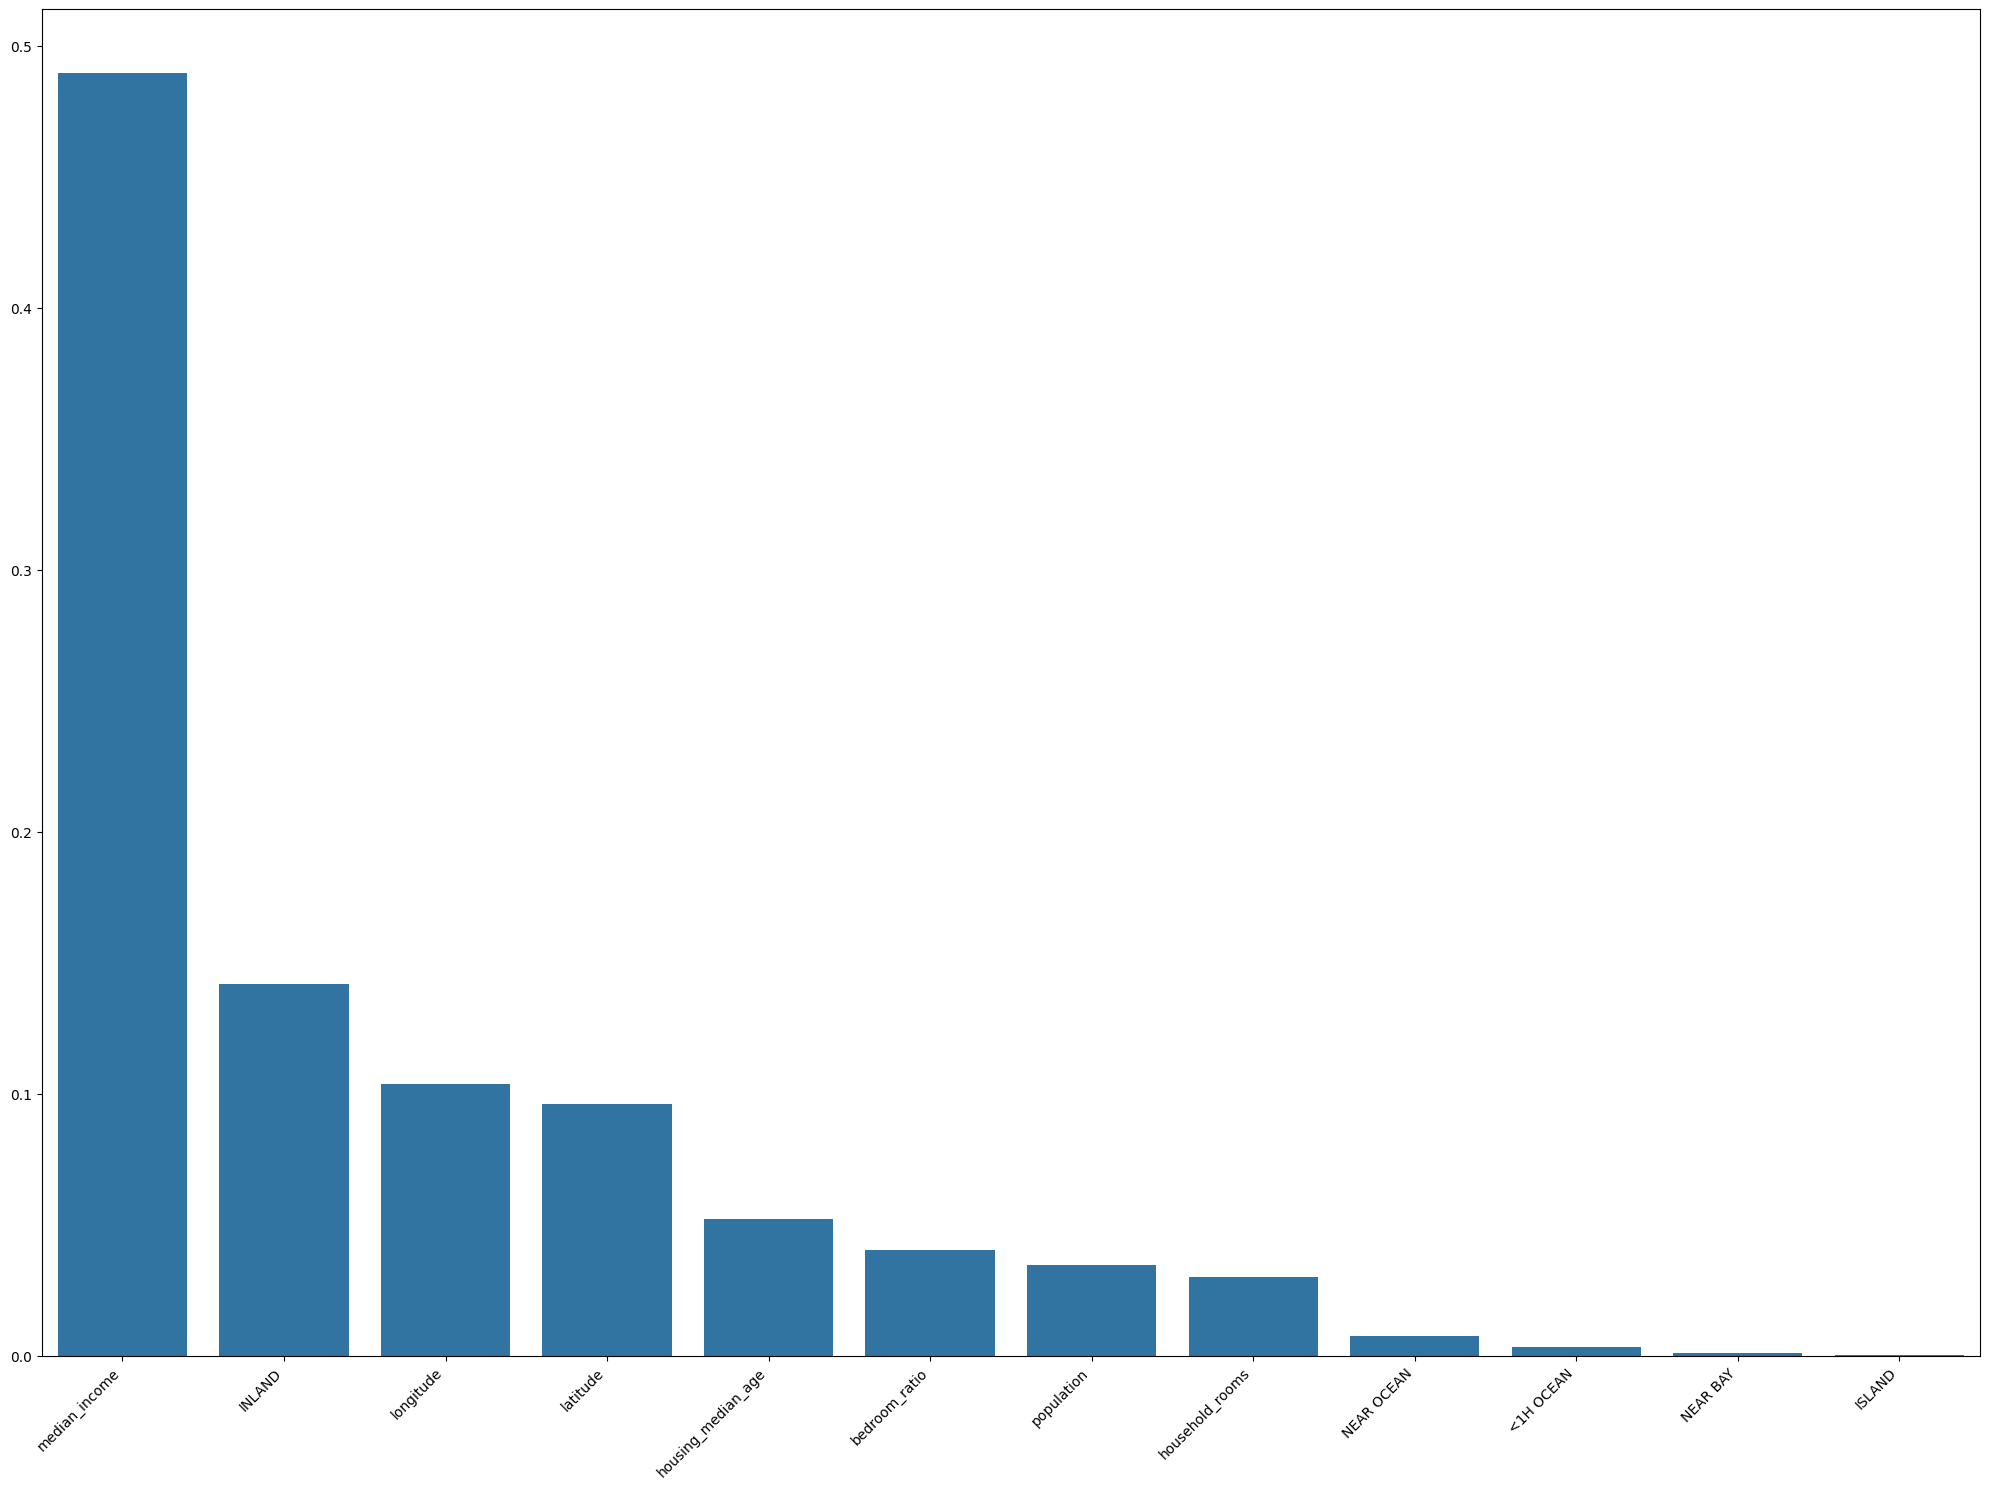

In [30]:
plt.figure(figsize=(20,15))
sns.barplot(x=feature_importances.keys(), y= feature_importances.values())
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
